In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data = pd.read_csv('./Downloads/FYPdataset1.csv', index_col = 'Date')
data = data.iloc[:2665, :]
data

,Open,High,Low,Close,Volume,AAPL,MSFT,AMZN,NASDAQ,NYSE,...,MACD,20sd,upper_band,lower_band,ema,momentum,FFT 3 components,FFT 6 components,FFT 9 components,FFT 100 components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,0.017242,0.016510,0.017037,0.017122,0.264750,0.000777,0.017026,0.002625,0.007037,0.061053,...,0.516820,0.076044,0.025523,0.015825,0.017140,0.017122,0.564214,0.321353,0.264879,0.000000
2010-02-03,0.016119,0.017782,0.017149,0.018869,0.189564,0.001464,0.017557,0.002896,0.007097,0.055666,...,0.518331,0.070236,0.024099,0.015772,0.018243,0.018869,0.562315,0.318366,0.261424,0.004917
2010-02-04,0.017605,0.017052,0.016665,0.016340,0.215510,0.000000,0.015089,0.002023,0.002409,0.032334,...,0.517334,0.069241,0.023259,0.015132,0.016917,0.016340,0.560416,0.315389,0.257986,0.010258
2010-02-05,0.016071,0.016250,0.016103,0.017152,0.200316,0.000695,0.015651,0.002424,0.003532,0.031866,...,0.517755,0.068901,0.022662,0.014586,0.017019,0.017152,0.558516,0.312421,0.254564,0.015790
2010-02-08,0.016803,0.017764,0.017747,0.017545,0.168675,0.000422,0.014714,0.002269,0.002453,0.025557,...,0.518850,0.065207,0.021618,0.014405,0.017316,0.017545,0.556615,0.309462,0.251160,0.021299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26,0.494337,0.509483,0.501258,0.513179,0.073533,0.683202,0.618994,0.920073,0.685487,0.605162,...,0.704326,0.271786,0.488511,0.457321,0.509719,0.513179,0.847536,0.512342,0.506244,0.506449
2020-08-27,0.508705,0.507775,0.507716,0.507561,0.037795,0.674567,0.635958,0.908521,0.682643,0.607568,...,0.719285,0.301392,0.493611,0.455298,0.509702,0.507561,0.848666,0.513637,0.507285,0.507366
2020-08-28,0.502596,0.505412,0.510179,0.511488,0.022477,0.673411,0.643237,0.909018,0.687676,0.616923,...,0.733677,0.324644,0.499043,0.455223,0.512326,0.511488,0.849794,0.514941,0.508334,0.507830


##Training,Test and Validation split


In [ ]:
# Store the column in a variable
#temp_column = data['Close']

data['y'] = data['Close']
# Drop the column from the original DataFrame
data.drop('Close', axis=1, inplace=True)

# Add the column back to the DataFrame, which will place it at the end
#data['Close'] = temp_column

x = data.iloc[:, :-1].values  # Selects all columns except the last one ('Close')
y = data.iloc[:, -1].values   # Selects the 'Close' column

# Splitting the data into train and test sets
# Calculate the indices for splitting
train_split = int(data.shape[0] * 0.7)  # 70% for training
validation_split = int(data.shape[0] * 0.85)  # Additional 15% for validation

# Split the data into training, validation, and testing sets
train_x, validation_x, test_x = x[:train_split, :], x[train_split:validation_split, :], x[validation_split:, :]
train_y, validation_y, test_y = y[:train_split], y[train_split:validation_split], y[validation_split:]

# Print the shapes of the sets
print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'validationX: {validation_x.shape} validationY: {validation_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')


trainX: (1865, 25) trainY: (1865,)
validationX: (400, 25) validationY: (400,)
testX: (400, 25) testY: (400,)


##Variational Autoencoder
VAE is a type of autoencoder that generates new data points with the same statistical properties as the training set.

In [ ]:
class VAE(nn.Module):
  # config indicates the size of layers in the nn
  #latent_dim representing the dimensionality of the latent space
    def __init__(self, config, latent_dim):
        super().__init__()

      #Building the encoder
      #iterates through the config list to create series of linear layes followed by ReLU activation function
        modules = []
        for i in range(1, len(config)):
            modules.append(
                #wrapped in sequential which allows combining multiple operations into a single module
                nn.Sequential(
                    #creates a fully connected layer between successive elements
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        #two fully connected layers are defined to ouput the mean and log variance of the latent space distribution
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        #building the decoder
        #maps the latent space dimension back to the dimensionality of the last encoder layer
        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        #reverses the process of the encoder, creating layers that map from the latent space representation back to the original input space
        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        #last layer uses a sigmoid function as our inputs have been normalized between zero and one.
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

  #this function passes input x through the encoder to produce the parameters of the latent space distribution
    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

  #reconstructs the input from its latent reprentation
    def decode(self, x):
        result = self.decoder(x)
        return result

  #allows backpropagation through random sampling.
  #this allows the model to learn the distribution parameters that best approximate the data.
    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

  #defines how the data moves through the VAE.
    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [ ]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([25, 400, 400, 400, 10], 10)

[1/300] Loss: 607.8194
[2/300] Loss: 602.3043
[3/300] Loss: 598.7933
[4/300] Loss: 595.4797
[5/300] Loss: 592.1732
[6/300] Loss: 588.7925
[7/300] Loss: 585.3246
[8/300] Loss: 581.8969
[9/300] Loss: 578.7422
[10/300] Loss: 575.8008
[11/300] Loss: 573.0293
[12/300] Loss: 570.2833
[13/300] Loss: 566.7841
[14/300] Loss: 563.6053
[15/300] Loss: 560.5880
[16/300] Loss: 557.5448
[17/300] Loss: 554.2663
[18/300] Loss: 550.9481
[19/300] Loss: 547.5448
[20/300] Loss: 544.0906
[21/300] Loss: 540.5731
[22/300] Loss: 537.0050
[23/300] Loss: 533.3845
[24/300] Loss: 529.7341
[25/300] Loss: 526.0324
[26/300] Loss: 522.3157
[27/300] Loss: 518.5393
[28/300] Loss: 514.7400
[29/300] Loss: 510.9076
[30/300] Loss: 507.0616
[31/300] Loss: 503.1604
[32/300] Loss: 499.2611
[33/300] Loss: 495.3430
[34/300] Loss: 491.4128
[35/300] Loss: 487.4487
[36/300] Loss: 483.4974
[37/300] Loss: 479.4973
[38/300] Loss: 475.5043
[39/300] Loss: 471.5093
[40/300] Loss: 467.5036
[41/300] Loss: 463.5052
[42/300] Loss: 459.4869
[

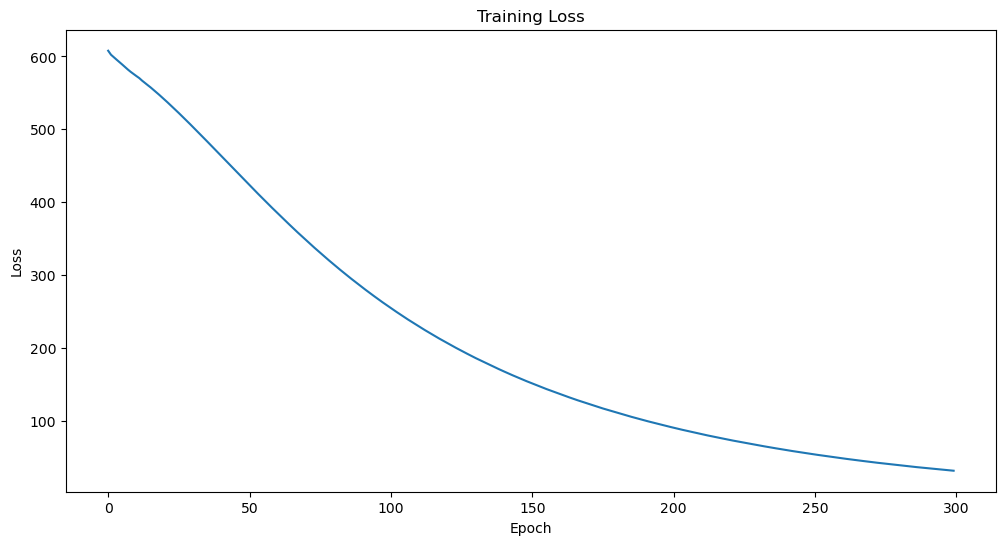

In [ ]:
class VAETrainer:
    def __init__(self, model, train_loader, num_epochs=300, learning_rate=0.00003, use_cuda=True):
        self.model = model
        self.train_loader = train_loader
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
        self.model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.hist = np.zeros(num_epochs)

    def train(self):
        for epoch in range(self.num_epochs):
            loss_ = []
            for (x, ) in self.train_loader:
                x = x.to(self.device)
                self.optimizer.zero_grad()
                output, z, mu, logVar = self.model(x)
                kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
                loss = F.binary_cross_entropy(output, x) + kl_divergence
                loss.backward()
                self.optimizer.step()
                loss_.append(loss.item())
            self.hist[epoch] = np.sum(loss_)
            print('[{}/{}] Loss: {:.4f}'.format(epoch + 1, self.num_epochs, self.hist[epoch]))
        self.plot_loss()

    def plot_loss(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.hist)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

# Assuming 'model' is defined and 'train_loader' is your DataLoader for training data
trainer = VAETrainer(model=model, train_loader=train_loader)
trainer.train()


In [ ]:
model.eval()
_, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))

_, VAE_validation_x, validation_x_mu, validation_x_var = model(torch.from_numpy(validation_x).float().to(device))

_, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))

In [ ]:
# Reshape train_y and test_y to 2D arrays
train_y = train_y.reshape(-1, 1)
validation_y = validation_y.reshape(-1,1)
test_y = test_y.reshape(-1, 1)
print(train_y.shape)
print(test_y.shape)
print(validation_y.shape)

print(train_x.shape)
print(test_x.shape)
print(validation_x.shape)

(1865, 1)
(400, 1)
(400, 1)
(1865, 25)
(400, 25)
(400, 25)


##Sliding Window
Role of the sliding window

- Temporal Dependency Capture

- Feature Construction

- Data Structuring


Time series forecasting is treated as a supervised learning problem where the model needs to learn the mapping from past observations to future values.

Unlike cross-sectional data, where observations are independent, time series data is sequential, and the sliding window respects and utilizes this sequence.

In [ ]:
# x = features  y = target  window = number of time steps to look back
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    #iteratures through the time series starting from the index equal to the window size
    for i in range(window, x.shape[0]):
      # constructs a sequence of observation which serves as the input features
        tmp_x = x[i - window: i, :]
        #setting the target window
        tmp_y = y[i]

        tmp_y_gan = y[i - window: i + 1]
        #building batches of data
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    #converted to Numpy arrays tehn to pytorch tensors
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [ ]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
validation_x = np.concatenate((validation_x, VAE_validation_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)
train_x.shape

(1865, 35)

In [ ]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
validation_x_slide, validation_y_slide, validation_y_gan = sliding_window(validation_x, validation_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'validation_x: {validation_x_slide.shape} validation_y: {validation_y_slide.shape} validation_y_gan: {validation_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')

train_x: torch.Size([1862, 3, 35]) train_y: torch.Size([1862, 1]) train_y_gan: torch.Size([1862, 4, 1])
validation_x: torch.Size([397, 3, 35]) validation_y: torch.Size([397, 1]) validation_y_gan: torch.Size([397, 4, 1])
test_x: torch.Size([397, 3, 35]) test_y: torch.Size([397, 1]) test_y_gan: torch.Size([397, 4, 1])


In [ ]:

# Assuming train_x_slide is your variable
print(type(train_x_slide))

<class 'torch.Tensor'>


In [ ]:
torch.save(train_x_slide, './Downloads/train_x_slide.pt')
torch.save(train_y_slide, './Downloads/train_y_slide.pt')
torch.save(train_y_gan, './Downloads/train_y_gan.pt')

torch.save(validation_x_slide, './Downloads/validation_x_slide.pt')
torch.save(validation_y_slide, './Downloads/validation_y_slide.pt')
torch.save(validation_y_gan, './Downloads/validation_y_gan.pt')

torch.save(test_x_slide, './Downloads/test_x_slide.pt')
torch.save(test_y_slide, './Downloads/test_y_slide.pt')
torch.save(test_y_gan, './Downloads/test_y_gan.pt')


